### Initial setups

In [ ]:
import gym
import neat
import numpy as np
import gym_sokoban
import os
import pickle
file_name = 'winner_test.pkl'

import neat
import visualize

# # 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run():
    config_path = 'config-feedforward-3'
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    print(f"population: {p}")

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.draw_net(config, winner, True, node_names=node_names, prune_unused=Fale)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    # p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    # p.run(eval_genomes, 10)

run()


 ****** Running generation 0 ****** 

Population's average fitness: -19.98000 stdev: 0.14000
Best fitness: -19.00000 - size: (9, 441) - species 1 - id 23
Average adjusted fitness: 0.020
Mean genetic distance 1.894, standard deviation 0.252
Population of 100 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    44    -19.0    0.020     0
     2    0    10       --       --     0
     3    0    16       --       --     0
     4    0    12       --       --     0
     5    0     5       --       --     0
     6    0    11       --       --     0
     7    0     2       --       --     0
Total extinctions: 0
Generation time: 177.804 sec
Saving checkpoint to neat-checkpoint-0

 ****** Running generation 1 ****** 

Population's average fitness: -19.98000 stdev: 0.14000
Best fitness: -19.00000 - size: (9, 441) - species 1 - id 23
Average adjusted fitness: 0.006
Mean genetic distance 2.284, standard deviation 0.300
Population 

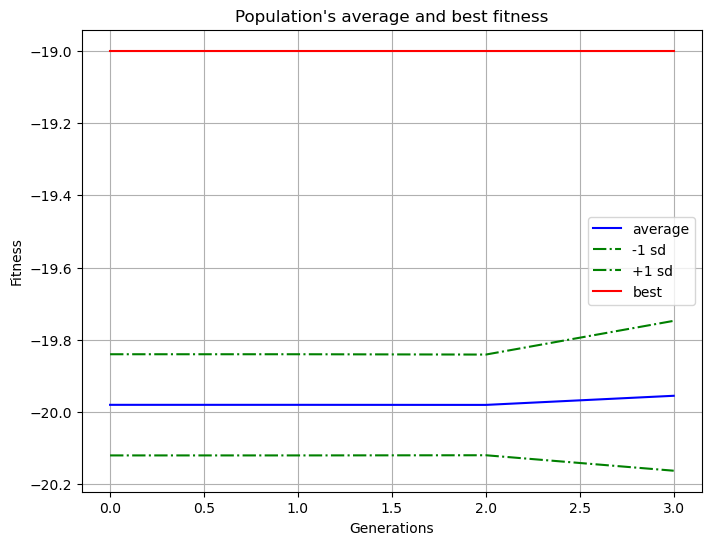

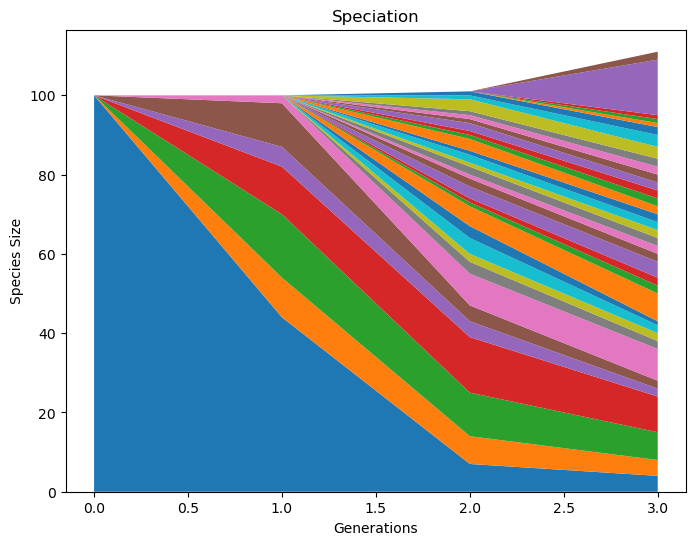

In [2]:
import gym
import neat
import numpy as np
import gym_sokoban
import pickle
# import os
file_name = 'winner_test_3.pkl'

import neat
import visualize

def process_observation(environment):
    # Convert the observation to RGB frame or custom observation
    arr_walls, arr_goals, arr_boxes, arr_player = environment.render(mode='raw')

    # Initialize the combined array with walls (1s)
    combined = np.ones_like(arr_walls)
    
    # Set empty fields (0s)
    combined[arr_walls == 0] = 0
    
    # Set targets (3s)
    combined[arr_goals == 1] = 3
    
    # Set boxes (2s)
    combined[arr_boxes == 1] = 2
    
    # Set boxes on targets (4s)
    combined[(arr_boxes == 1) & (arr_goals == 1)] = 4
    
    # Set player position (5s)
    combined[arr_player == 1] = 5

    # Flatten the array
    flat_array = combined.flatten()
    
    return flat_array

# def ignore_same_state(

def fitness(genomes, config):
    env = gym.make('Sokoban-small-v1')
    for genome_id, genome in genomes:
        observation = env.reset()
        observation = process_observation(env)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        fitness = 0
        done = False

        while not done:
            nn_actions = net.activate(observation)
            action = np.argmax(nn_actions)
            observation, reward, done, info = env.step(action)
            observation = process_observation(env)
            fitness += reward
        
        genome.fitness = fitness
    env.close()



# Load configuration
config_path = 'config-feedforward-4'
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation,
                            config_path)

# Dynamically set the input size
env = gym.make('Sokoban-small-v1')
observation = env.reset()
# print(len(observation))
config.genome_config.num_inputs = len(observation)
# print(config.genome_config.num_inputs)

# Create the population
p = neat.Population(config)


# Add a reporter to show progress in the terminal
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(1))

# Run NEAT
winner = p.run(fitness, 4)

visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

# Save the winner
with open(file_name, 'wb') as f:
    pickle.dump(winner, f)
